In [1]:
import math
import numpy as np
import scipy
import scipy.optimize
import matplotlib.pyplot as plt
import csv

print 'Done.'

Done.


In [4]:
p1 = polytopes.hypercube(3)
p1 = p1.dilation(3)
#print 'vertices: ', list(p1.vertices())
face_p1 = p1.faces(1)
#print 'edges: ', face_p1
faces = []
for i in range(len(face_p1)):
    faces.append([])
for i in range(len(face_p1)):
    faces[i].append(list(list(face_p1)[i].vertices()[0]))
    faces[i].append(list(list(face_p1)[i].vertices()[1]))
print faces
print 'contains: ', on_edge([-3,-3,0], faces)

[[[-3, -3, -3], [-3, -3, 3]], [[-3, -3, -3], [-3, 3, -3]], [[-3, -3, 3], [-3, 3, 3]], [[-3, 3, -3], [-3, 3, 3]], [[-3, -3, -3], [3, -3, -3]], [[-3, -3, 3], [3, -3, 3]], [[3, -3, -3], [3, -3, 3]], [[-3, 3, -3], [3, 3, -3]], [[3, -3, -3], [3, 3, -3]], [[-3, 3, 3], [3, 3, 3]], [[3, -3, 3], [3, 3, 3]], [[3, 3, -3], [3, 3, 3]]]
contains:  1


In [3]:
def exist(pts, latt):
    latt = np.array(latt)
    for i in range(pts.shape[0]):
        if pts[i][0]==latt[0]:
            if pts[i][1]==latt[1]:
                if pts[i][2]==latt[2]:
                    return 1
    return 0

def face_list(p1):
    face_p1 = p1.faces(1)
    list_face_p1 = list(face_p1)
    faces = []
    for i in range(len(face_p1)):
        faces.append([])
    for i in range(len(face_p1)):
        faces[i].append(list(list_face_p1[i].vertices()[0]))
        faces[i].append(list(list_face_p1[i].vertices()[1]))
    return faces

def dist(p1, p2):
    return sqrt((p1[0]-p2[0])^2+(p1[1]-p2[1])^2+(p1[2]-p2[2])^2)

def on_edge(latt, faces):
    for i in range(len(faces)):
        if (dist(faces[i][0], faces[i][1]) == (dist(faces[i][0], latt) + dist(faces[i][1], latt))):
            #print 'edge: ', faces[i][0], ' and ', faces[i][1]
            #print 'l1: ', dist(faces[i][0], faces[i][1])
            #print 'l2: ', dist(faces[i][0], latt) + dist(faces[i][1], latt)
            return 1
    return 0

def add_lattice(poly):
    pts = []
    vert = list(poly.vertices())
    num_pts = len(vert)
    
    for i in range(num_pts):
        pts.append(list(vert[i]))
        
    pts = np.array(pts)
    pts_max = int(max(np.amax(pts, axis=0)))+1
    pts_new = pts
    
    faces = face_list(poly)
    
    for i in range(-pts_max, pts_max):
        for j in range(-pts_max, pts_max):
            for k in range(-pts_max, pts_max):
                latt = [i,j,k]
                if latt in pts.tolist():
                    continue
                #if poly.contains(latt) == 1 or on_edge(latt, faces) == 1:
                if on_edge(latt, faces) == 1:
                    pts_new = np.append(pts_new, np.array(latt).reshape((1,3)), axis = 0)  
    print 'pts_new: '
    print pts_new
    pts_new = pts_new.tolist()
    #poly_new = PointConfiguration(pts_new)
    poly_new = Polyhedron(vertices = pts_new)
    return poly_new, pts_new
    
poly, pts = add_lattice(p1)

 pts_new: 
[[-3 -3 -3]
 [-3 -3  3]
 [-3  3 -3]
 [-3  3  3]
 [ 3 -3 -3]
 [ 3 -3  3]
 [ 3  3 -3]
 [ 3  3  3]
 [-3 -3 -2]
 [-3 -3 -1]
 [-3 -3  0]
 [-3 -3  1]
 [-3 -3  2]
 [-3 -2 -3]
 [-3 -2  3]
 [-3 -1 -3]
 [-3 -1  3]
 [-3  0 -3]
 [-3  0  3]
 [-3  1 -3]
 [-3  1  3]
 [-3  2 -3]
 [-3  2  3]
 [-3  3 -2]
 [-3  3 -1]
 [-3  3  0]
 [-3  3  1]
 [-3  3  2]
 [-2 -3 -3]
 [-2 -3  3]
 [-2  3 -3]
 [-2  3  3]
 [-1 -3 -3]
 [-1 -3  3]
 [-1  3 -3]
 [-1  3  3]
 [ 0 -3 -3]
 [ 0 -3  3]
 [ 0  3 -3]
 [ 0  3  3]
 [ 1 -3 -3]
 [ 1 -3  3]
 [ 1  3 -3]
 [ 1  3  3]
 [ 2 -3 -3]
 [ 2 -3  3]
 [ 2  3 -3]
 [ 2  3  3]
 [ 3 -3 -2]
 [ 3 -3 -1]
 [ 3 -3  0]
 [ 3 -3  1]
 [ 3 -3  2]
 [ 3 -2 -3]
 [ 3 -2  3]
 [ 3 -1 -3]
 [ 3 -1  3]
 [ 3  0 -3]
 [ 3  0  3]
 [ 3  1 -3]
 [ 3  1  3]
 [ 3  2 -3]
 [ 3  2  3]
 [ 3  3 -2]
 [ 3  3 -1]
 [ 3  3  0]
 [ 3  3  1]
 [ 3  3  2]]


In [154]:
faces = face_list(p1)
print on_edge([0,0,0], faces)

edge:  [-3, -3, -3]  and  [-3, -3, 3]
l1:  6
l2:  6*sqrt(3)
1


In [160]:
face_pts = list(poly.faces(2))
print face_pts

print 'original pts: ', pts
pts_removed = pts
pts_save = np.array(pts)

remove_pt = list(face_pts[0].vertices()[0])
pts_removed.remove(remove_pt)
print 'removed pts: ', pts_removed

pts = pts_save.tolist()

poly_new = Polyhedron(vertices = pts_removed)
face_new = list(poly_new.faces(2))
print 'new vertices: ', poly_new.vertices()

[<1,2,3,4>, <1,3,5,6>, <0,3,4,6>, <0,2,4,7>, <0,5,6,7>, <1,2,5,7>]
original pts:  [[-3, -3, -3], [-3, -3, 3], [-3, 3, -3], [-3, 3, 3], [3, -3, -3], [3, -3, 3], [3, 3, -3], [3, 3, 3], [-3, -3, -2], [-3, -3, -1], [-3, -3, 0], [-3, -3, 1], [-3, -3, 2], [-3, -2, -3], [-3, -2, 3], [-3, -1, -3], [-3, -1, 3], [-3, 0, -3], [-3, 0, 3], [-3, 1, -3], [-3, 1, 3], [-3, 2, -3], [-3, 2, 3], [-3, 3, -2], [-3, 3, -1], [-3, 3, 0], [-3, 3, 1], [-3, 3, 2], [-2, -3, -3], [-2, -3, 3], [-2, 3, -3], [-2, 3, 3], [-1, -3, -3], [-1, -3, 3], [-1, 3, -3], [-1, 3, 3], [0, -3, -3], [0, -3, 3], [0, 3, -3], [0, 3, 3], [1, -3, -3], [1, -3, 3], [1, 3, -3], [1, 3, 3], [2, -3, -3], [2, -3, 3], [2, 3, -3], [2, 3, 3], [3, -3, -2], [3, -3, -1], [3, -3, 0], [3, -3, 1], [3, -3, 2], [3, -2, -3], [3, -2, 3], [3, -1, -3], [3, -1, 3], [3, 0, -3], [3, 0, 3], [3, 1, -3], [3, 1, 3], [3, 2, -3], [3, 2, 3], [3, 3, -2], [3, 3, -1], [3, 3, 0], [3, 3, 1], [3, 3, 2]]
removed pts:  [[-3, -3, -3], [-3, -3, 3], [-3, 3, -3], [-3, 3, 3], [3, -3

In [147]:
print face_new
poly_new.plot().save("plot1.png")

[<0,1,2>, <1,2,3,4>, <0,2,3,5>, <0,1,6>, <1,4,6>, <0,5,6>, <3,4,5,6>]


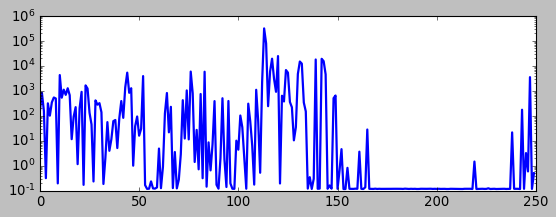

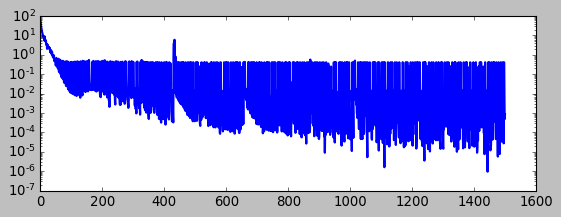

In [16]:
import matplotlib.pyplot as plt
from matplotlib import pyplot

loss_test_path = 'pointnet-master/log/test/loss_test.txt'
loss_train_path = 'pointnet-master/log/train/loss_train.txt'
loss_test = open(loss_test_path, 'r')
loss_train = open(loss_train_path, 'r')
test = [eval(line) for line in loss_test]
train = [eval(line) for line in loss_train]
len_test = len(test)
len_train = len(train)

#a = [ pow(10,i) for i in range(10) ]
pyplot.subplot(2,1,1)
pyplot.plot(test, color='blue', lw=2)
pyplot.yscale('log')
pyplot.show()

pyplot.subplot(2,1,1)
pyplot.plot(train, color='blue', lw=2)
pyplot.yscale('log')
pyplot.show()

In [2]:
SIDE_LENGTH = 3
print 'output/vol/cube/failed/%dx%d_failed.txt' % (SIDE_LENGTH, SIDE_LENGTH)
fail_out = open('output/vol/cube/failed/%dx%d_failed.txt' % (SIDE_LENGTH, SIDE_LENGTH), 'w')

output/vol/cube/failed/3x3_failed.txt


In [27]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import math

def func(x,y):
    z = np.sqrt(x*(x*y**(1/4) + y + y*(x/(y**(1/4)*np.sqrt(x + y)*np.sqrt(y**(1/4) + np.sqrt(y))) + 2*y)/(10*x)))
#     z = np.sqrt(y*(y**(5/4) + y + y*(np.sqrt(2)*x/(2*y**(3/4)*np.sqrt(np.sqrt(x) + y**(1/4))) + 2*y)/(10*x)))
#     z = np.sqrt(x*(x*y**(1/4) + x + y*(np.sqrt(2)*x/(2*y**(3/4)*np.sqrt(np.sqrt(x) + y**(1/4))) + 2*y)/(10*x)))

#     z = sqrt(x*(x*y**(1/4) + y + y*(x/(y**(1/4)*sqrt(sqrt(x) + y**(1/4))*sqrt(x + y)) + 2*y)/(10*x)))
    return z

test_file = open('output/train/cylinder/tri_1_to_50_2.txt', 'r')
counter = 0
diff_max = 0

test_x = []
test_y = []
diff_list = []
outlier = []

for line in test_file:
#     if counter >= 100:
#         break
#     sel = np.random.randint(2)
#     if sel == 0:
#         continue
    data = eval(line)
    test = float(data[1])
    if test <= 0:
        break
    test = 1/test
    x = data[0][1]
    y = data[0][2]
    test_x.append(x)
    test_y.append(y)
    z = float(func(x,y))
    diff = abs(test - z)
    if diff/x > 3.0/5.0:
        outlier.append([x, y, z, test])
    diff_list.append(diff)
#     counter += 1

for group in outlier:
    x = group[0]
    y = group[1]
    z = group[2]
    test = group[3]
    print 'x: ', x, '     y: ', y, '     predict: ', z, '     truth: ', test

x:  8      y:  1      predict:  8.50814679048      truth:  1.70016026877
x:  8      y:  2      predict:  9.65261328995      truth:  1.54004023118
x:  11      y:  3      predict:  13.9437727399      truth:  1.30946541908
x:  13      y:  4      predict:  17.1663836244      truth:  3.951752493
x:  8      y:  2      predict:  9.65261328995      truth:  1.5877971596
x:  4      y:  4      predict:  6.48412642058      truth:  2.44476867083
x:  5      y:  3      predict:  7.06630438375      truth:  2.53150571581
x:  9      y:  6      predict:  13.726487992      truth:  2.0769564193
x:  10      y:  10      predict:  17.2740746541      truth:  2.41311556769
x:  15      y:  5      predict:  20.4214118565      truth:  4.80627291885
x:  9      y:  4      predict:  12.4150470312      truth:  1.09893103714
x:  15      y:  7      predict:  21.941867932      truth:  12.170480527
x:  18      y:  3      predict:  21.970908646      truth:  8.44512347975
x:  15      y:  15      predict:  26.7144410988     

x:  18      y:  3      predict:  21.970908646      truth:  8.44512347975
x:  15      y:  15      predict:  26.7144410988      truth:  6.9071890012
x:  24      y:  4      predict:  30.2403916557      truth:  13.9433842724
x:  19      y:  7      predict:  27.0327570508      truth:  1.36292937321
x:  19      y:  13      predict:  31.1007615163      truth:  5.72508341346
x:  29      y:  8      predict:  40.7462345992      truth:  6.94891027899
x:  12      y:  4      predict:  15.9782969399      truth:  3.12357927344
x:  33      y:  4      predict:  40.9403104284      truth:  7.79204534092
x:  13      y:  5      predict:  17.9789971064      truth:  3.68975166284
x:  20      y:  4      predict:  25.4854928219      truth:  4.72747674389
x:  15      y:  10      predict:  23.8929247359      truth:  9.07137405188
x:  25      y:  2      predict:  28.1878685334      truth:  1.35544346598
x:  16      y:  4      predict:  20.7312885252      truth:  4.90623338156
x:  18      y:  3      predict:  21.9

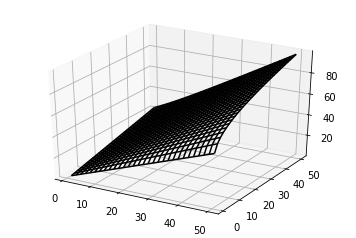

In [28]:
from mpl_toolkits.mplot3d import Axes3D
# fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4)
fig = plt.figure()
ax1 = plt.axes(projection='3d')
x = np.linspace(1, 50, 30)
y = np.linspace(1, 50, 30)
X, Y = np.meshgrid(x, y)
Z = func(X, Y)
ax1.plot_wireframe(X, Y, Z, color='black')

10100
10100
10100


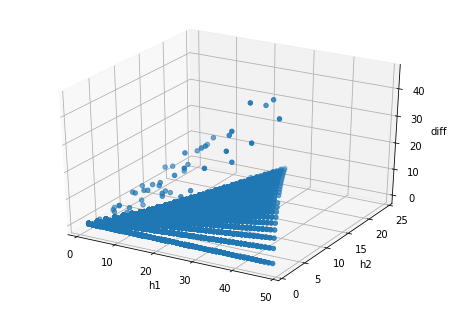

In [29]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
print len(test_x)
print len(test_y)
print len(diff_list)
ax.scatter(test_x, test_y, diff_list)
ax.set_xlabel('h1')
ax.set_ylabel('h2')
ax.set_zlabel('diff')
plt.show()

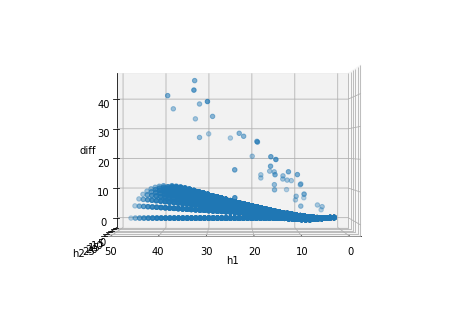

In [33]:
ax.view_init(0, 90)
fig